<a href="https://colab.research.google.com/github/Melikakmm/CLPBgroup17/blob/main/05_clustering/initializers_and_perplexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A quick introduction to t_SNE:

The goal of t_SNE is to visualize the higher dimension feature spece to lower dimension. This way of data reduction is used before using various methods of machine learning in order to have better understanding of data in lower dimension, since it is really difficult to understand what is going on in higgher dimension.

This method of visualization has got its own cost function which is a penalty when the data in lower dimension does not represent the higher dimensional ones. The eventual goal of this method is to choose the best hyperparameters to minimize the loss function in order to have better result.

### perplexity:
one of the most important parameters here is perplexity. Perplexity is roughly introduced the number of neighbouring points that the algorithm wants to preserve during the embedding. If we choose very low perplexity it means we want to preserve a few points as neighbours which for huge data sets might not be good idea, since we might end up having a lot of clusters. At the same time, choosing large perplexity, for example equal to number of samples, we might have a few or just one clusters which leads to penalization from cost function. The best way to choose the perplexity is to try different numbers for the process and see what is the result and choose the one with the best clustering.



In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14

# manifold.TSNE
from sklearn import manifold  #, datasets
from time import time

## Data and labels 
In this example we know the labels, hence we can test the performances of t-SNE and DBSCAN

In [ ]:
#fname,fnamey="x_def_3d.dat","y_def_3d.dat"
fname,fnamey="x_3d.dat","y_3d.dat"
data=np.loadtxt('/content/x_3d (1).dat', delimiter='\t')
y=np.loadtxt("/content/y_3d (1).dat",dtype=int)
N=len(data)
D=len(data[0])
print("N=",N,"  D=",D)
x=data

N= 1000   D= 3


In [ ]:
def dist(x,i,j):
    return np.linalg.norm(x[i]-x[j])

print(dist(x,13,1))
mdist = np.zeros(N)
for i in range(N):
    dm = 1e100
    for j in range(N):
        if i!=j:
            dij = dist(x,i,j);
            if dij<dm:
                dm = dij
    mdist[i] = dm
mean_min_dist = mdist.mean()
print("mean minimum distance between points: ",mean_min_dist)

1552.6302096770091
mean minimum distance between points:  18.55757910124019


##Here I tried to come up with the best perplexity.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rat

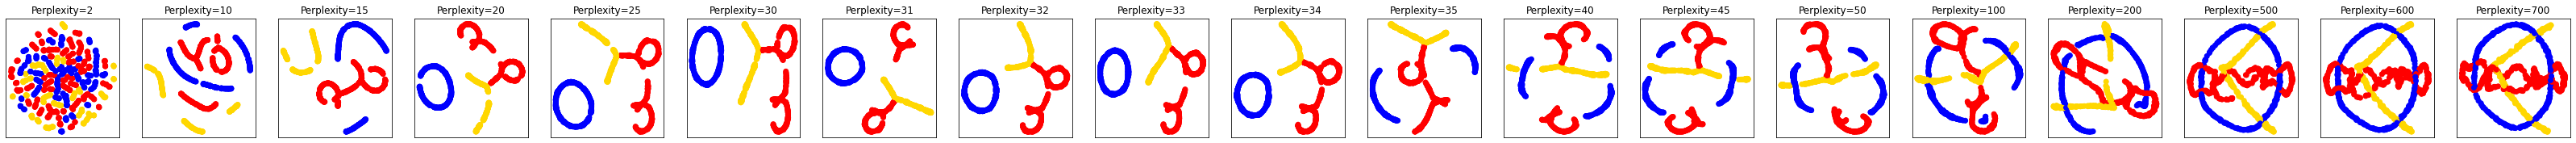

In [ ]:
#without cahngin the initializer:




np.random.seed(0)
n_samples = N
n_components = 2 

#previous perplexities = [5, 10, 20, 40, 80]
perplexities = [2,10, 15, 20, 25, 30, 31, 32, 33, 34, 35, 40, 45 , 50, 100, 200, 500, 600, 700]
Np = len(perplexities)
mycmap = ListedColormap(["blue","red","gold" ])

(fig, subplots) = plt.subplots(1,Np , figsize=(3*Np, 2.7))

X_all = [None]
for i, perplexity in enumerate(perplexities):
    ax = subplots[i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random', n_iter = 2000,
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(data)
    t1 = time()
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=y,cmap=mycmap)
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    X_all.append(Y)
    
plt.show()

### Result:  As it can be seen for large perplexity from 100 to 700 , the algorithm begins to represent the samples in higher dimension rather than their neighbouring, or in other words their similarities.On the other hand, choosing very small perplexity leads to very poor performance, since the algorithem tend to create various groups of samples with a few point.




##The best perplexities happends with perplexities from 20 to 34. As we understood here number of perplexities are crucial to get a better result, and they should be chosen based on experiment.

#Initializer : 



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.

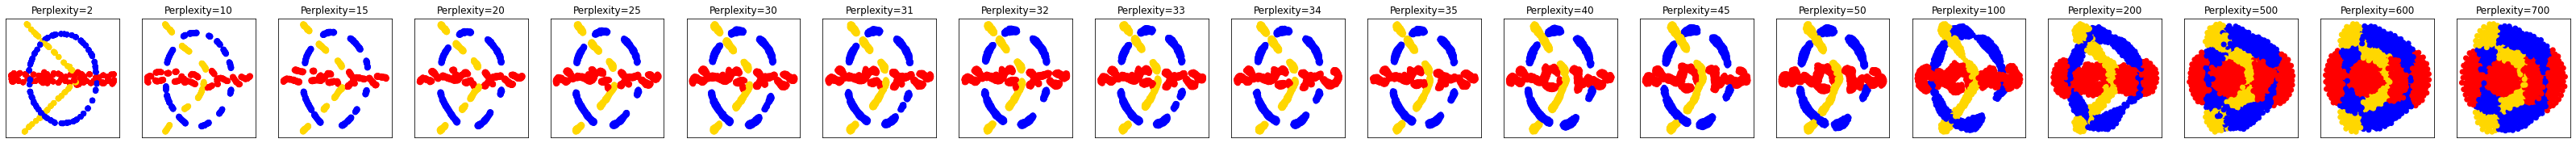

In [ ]:
np.random.seed(0)
n_samples = N
n_components = 2 

#previous perplexities = [5, 10, 20, 40, 80]
perplexities = [2,10, 15, 20, 25, 30, 31, 32, 33, 34, 35, 40, 45 , 50, 100, 200, 500, 600, 700]
Np = len(perplexities)
mycmap = ListedColormap(["blue","red","gold" ])

(fig, subplots) = plt.subplots(1,Np , figsize=(3*Np, 2.7))

X_all = [None]
for i, perplexity in enumerate(perplexities):
    ax = subplots[i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='pca', n_iter= 2000,
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(data)
    t1 = time()
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=y,cmap=mycmap)
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    X_all.append(Y)
    
plt.show()

### using this initializer we understood that the result is very much similar to the original data in higher dimension. not only does this initializer provide better understanding of the orginal data, but also we get a very good result with most of the perplexities.